In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the class for Lattice
class Lattice(object):
    """A user-defined data structure that stores and manipulates lattice (2D - arrays)
    """

    def __init__(self, width, height, p):
        """Constructs a board of width and height"""
        self.height = height
        self.width = width
        self.data = np.random.rand(self.height, self.width)
        self.p = p
        self.clusters = []
        self.visited = set()
        self.span_clusters = []

        for i in range(0, height):
            for j in range(0, width):
                # if a random number is less than the probability picked, fill the lattice
                if self.data[i][j] <= self.p: 
                    self.data[i][j] = 1
                else:
                    self.data[i][j] = 0
    
    def __repr__(self):
        """Creates a 2D representation of the board object"""
        plt.imshow(self.data, cmap='gray')
        plt.show()
        return ""
    

    def clear(self):
        """clears the board, making the board only contain ' ' strings
        Return: nothing, the 2D array is changed
        """
        for i in range(0, self.height):
            for j in range(0, self.width):
                # clears the data and all of the arrays that have to do with the data
                self.data[i][j] = 0
                self.clusters = []
                self.span_clusters = []
                self.visited.clear()

    def get_clusters(self):
        for i in range(self.height):
            for j in range(self.width):
                if self.data[i][j] == 1 and (i, j) not in self.visited:
                    cluster = self.finish_cluster(i,j)
                    self.clusters.append(cluster)

        # get the spanning clusters ( does some repeated work but whatever)
        # loop through each of the clusters and get the starting point
        # count = 1

        # Okay, so there is something wrong with this. If a cluster does not start at the top row (0th row)
        # or leftMost column (0th column) then it will not see the cluster as a spanning path. So you 
        # have to loop through each cluster and if you find both a row with zero and a row with height-1
        # then you add this to the spanning cluster (you can do this with two booleans) and you do the same
        # but for the columns.
        #
        # Also its double counting and I do not know why. I thought I fixed it with the if and elif statements and break
        # lines but that did not
        for cluster in self.clusters:
            # print("Count: ", count)
            # count+=1
            startPoint = cluster[0]
            startRow = startPoint[0]
            startCol = startPoint[1]
            if startRow == 0 and startCol == 0:
                # we want to find if any other row equals height-1 or col = wdith-1
                for point in cluster:
                    # if the point is in the last row (self.height-1) then we want to add it to the spanning clusters array
                    if point[0] == self.height-1 or point[1] == self.width-1:
                        self.span_clusters.append(cluster)
                        break
            if startRow == 0:
                # we want to find if any other row equals height-1
                for point in cluster:
                    # if the point is in the last row (self.height-1) then we want to add it to the spanning clusters array
                    if point[0] == self.height-1:
                        self.span_clusters.append(cluster)
                        break
            if startCol == 0:
                # we want to find if any other column equals width-1
                for point in cluster:
                    # if the point is in column self.width-1 we add it to the spanning clusters array
                    if point[1] == self.width-1:
                        self.span_clusters.append(cluster)
                        break


        
        num_clusters = len(self.clusters)      
        return num_clusters, self.clusters, self.span_clusters
    
    def finish_cluster(self, i, j):
        if not (0 <= i < self.height and 0 <= j < self.width):
             return []
        if self.data[i][j] != 1 or (i, j) in self.visited:
            return []
        self.visited.add((i, j))
        res = [(i, j)]
        res += self.finish_cluster(i-1, j)
        res += self.finish_cluster(i+1, j)
        res += (self.finish_cluster(i, j+1))
        res += (self.finish_cluster(i,j-1))
        # print("res: ", res)
        return res 
    
    def color_spanning_cluster(self):
        """Colors spanning clusters """
        num_clusters, clusters, spanning = self.get_clusters()
        span_data = self.data
        for i in range(self.height):
            for j in range(self.width):
                if (i, j) in spanning[0]:
                    span_data[i][j] = -1
        plt.imshow(span_data, cmap='gray')
        plt.show()
        return ""




In [25]:
lattice = Lattice(10,10,0.6)

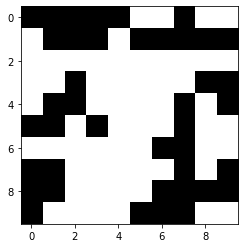

In [26]:
print(lattice)

Number of clusters: 5

Clusters: 
 [[(0, 5), (0, 6)], [(0, 8), (0, 9)], [(1, 0), (2, 0), (3, 0), (4, 0), (3, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (3, 4), (2, 4), (1, 4), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (8, 4), (7, 4), (6, 4), (5, 4), (6, 3), (7, 3), (8, 3), (9, 3), (9, 4), (9, 2), (8, 2), (7, 2), (6, 2), (5, 2), (6, 1), (6, 0), (9, 1), (7, 6), (5, 6), (4, 6), (3, 6), (2, 6), (2, 7), (3, 7), (2, 8), (2, 9)], [(4, 8), (5, 8), (6, 8), (7, 8), (6, 9), (5, 9)], [(9, 8), (9, 9)]]

Number of Spanning Clusters: 1

Spanning Clusters: 
 [[(1, 0), (2, 0), (3, 0), (4, 0), (3, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (3, 4), (2, 4), (1, 4), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (8, 4), (7, 4), (6, 4), (5, 4), (6, 3), (7, 3), (8, 3), (9, 3), (9, 4), (9, 2), (8, 2), (7, 2), (6, 2), (5, 2), (6, 1), (6, 0), (9, 1), (7, 6), (5, 6), (4, 6), (3, 6), (2, 6), (2, 7), (3, 7), (2, 8), (2, 9)]]


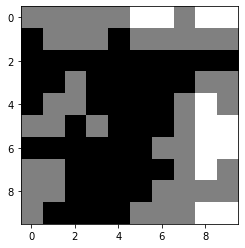

''

In [27]:
num_clusters, clusters, spanning = lattice.get_clusters()

print(f"Number of clusters: {num_clusters}")
print()
print(f"Clusters: \n {clusters}")
print()
print(f"Number of Spanning Clusters: {len(spanning)}")
print()
print(f"Spanning Clusters: \n {spanning}")

lattice.color_spanning_cluster()

In [14]:
test = []
print(test)

[]


In [15]:
test.append([])
print(test)

[[]]
